<a href="https://www.kaggle.com/code/santruptibehera/malware?scriptVersionId=174110620" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/os-counters/malware.csv


In [17]:
#Evaluation metrics

def precision(actual, predicted):
    # Precision = True pos out of the actual results
    
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted == 1)).astype(int))
    return TP/(TP + FP)
def recall(actual, predicted):
    # Recall = True pos out of the predicted results
    
    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 0)).astype(int))
    return TP/(TP + FN)
def f_score(actual , predicted):
    
    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

# Data Preprocessing

In [18]:
file_path = "/kaggle/input/os-counters/malware.csv"
df = pd.read_csv(file_path)

print("Original DataFrame:")
print(df.head())

# 1. Handling missing values
df.dropna(inplace=True)

# 2. Removing duplicates
df.drop_duplicates(inplace=True)

print("\nCleaned DataFrame:")
print(df.head())

cleaned_file_path = "/kaggle/working/cleaned_data.csv"  
df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Original DataFrame:
   % Privileged Time  Handle Count  IO Read Operations/sec  \
0           0.000000           566              181.278427   
1           3.061974           566              176.574982   
2           3.082626           566              183.874405   
3           0.000000           566              177.111252   
4           6.157445           566              194.997818   

   IO Data Operations/sec  IO Write Operations/sec  IO Other Operations/sec  \
0              239.963791                60.958015                      0.0   
1              235.824860                60.530598                      0.0   
2              244.917999                59.989555                      0.0   
3              237.261063                59.309383                      0.0   
4              272.631744               102.477898                      0.0   

   IO Read Bytes/sec  IO Write Bytes/sec  IO Data Bytes/sec  \
0        53579.65625         1896334.500        1944883.750   
1     

In [19]:
df = shuffle(df,random_state=20)
label_encoder = LabelEncoder()
# Encode the categorical column

df['Result'] = label_encoder.fit_transform(df['Result'])
data=df.iloc[:,:-1].values
labels = df['Result'].values
print(df.head(10))

      % Privileged Time  Handle Count  IO Read Operations/sec  \
2527           0.000000           149               30.675945   
2270          44.823078            30            57396.675780   
2282          36.174438            28            70492.390630   
2189          20.661211           125                0.000000   
1548           0.000000            61                0.000000   
2381          22.956875           125                0.000000   
2364           0.000000           151                0.000000   
1567           0.000000            61                0.000000   
122            0.000000           706                0.000000   
2196           0.000000           126                0.000000   

      IO Data Operations/sec  IO Write Operations/sec  \
2527               32.708714                 2.044017   
2270           210758.875000             59564.738280   
2282           162555.843800             73041.187500   
2189               32.028934                31.995239   

In [20]:
X = df.iloc[:, :-1].values  # Selects all rows and all columns except the last one
y = df.iloc[:, 23].values    # Selects all rows and the 23rd column as the target variable
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=20)

[[0.00000000e+00 1.49000000e+02 3.06759453e+01 ... 8.60160000e+06
  8.52787200e+06 2.13401600e+06]
 [4.48230782e+01 3.00000000e+01 5.73966758e+04 ... 5.57752320e+07
  8.35174400e+06 6.06208000e+06]
 [3.61744385e+01 2.80000000e+01 7.04923906e+04 ... 5.57752320e+07
  6.31193600e+06 1.52371200e+07]
 ...
 [1.40872030e+01 1.26000000e+02 0.00000000e+00 ... 2.44367360e+07
  1.65642240e+07 2.67878400e+06]
 [0.00000000e+00 3.67500000e+03 0.00000000e+00 ... 1.89071360e+08
  9.28563200e+07 3.74005760e+07]
 [0.00000000e+00 6.00000000e+01 0.00000000e+00 ... 4.03046400e+06
  3.94035200e+06 1.01171200e+06]]
[0 0 0 ... 0 1 0]


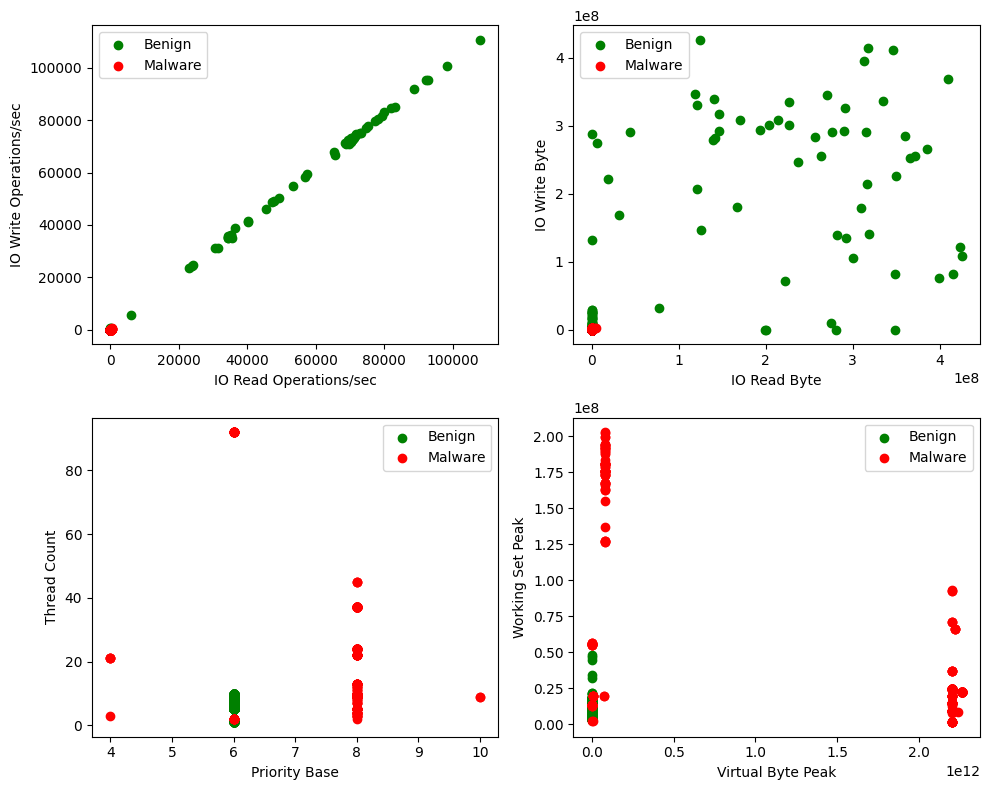

In [21]:
# Visualise using a scatter plot the DataFrame 
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) #2 rows and 2 columns

# Plot data on each subplot
axs[0, 0].scatter(X[y == 0][:, 2], X[y == 0][:, 4], color='green', label='Benign')
axs[0, 0].scatter(X[y == 1][:, 2], X[y == 1][:, 4], color='red', label='Malware')
axs[0, 0].set_xlabel('IO Read Operations/sec')
axs[0, 0].set_ylabel('IO Write Operations/sec')
axs[0, 0].legend()

axs[0, 1].scatter(X[y == 0][:, 6], X[y == 0][:, 7], color='green', label='Benign')
axs[0, 1].scatter(X[y == 1][:, 6], X[y == 1][:, 7], color='red', label='Malware')
axs[0, 1].set_xlabel('IO Read Byte')
axs[0, 1].set_ylabel('IO Write Byte')
axs[0, 1].legend()

axs[1, 0].scatter(X[y == 0][:, 16], X[y == 0][:, 17], color='green', label='Benign')
axs[1, 0].scatter(X[y == 1][:, 16], X[y == 1][:, 17], color='red', label='Malware')
axs[1, 0].set_xlabel('Priority Base')
axs[1, 0].set_ylabel('Thread Count')
axs[1, 0].legend()

axs[1, 1].scatter(X[y == 0][:, 18], X[y == 0][:, 21], color='green', label='Benign')
axs[1, 1].scatter(X[y == 1][:, 18], X[y == 1][:, 21], color='red', label='Malware')
axs[1, 1].set_xlabel('Virtual Byte Peak')
axs[1, 1].set_ylabel('Working Set Peak')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# Dimensionality reduction with Fisher's LDA

In [22]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

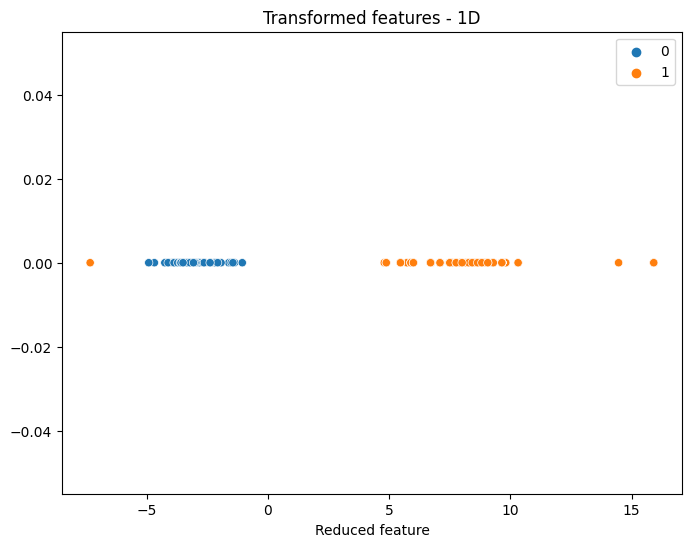

In [23]:
# Visualise using a scatter plot the DataFrame with the transformed feature and the class labels
tmp_df = pd.DataFrame(X_train, columns=['Reduced feature'])
tmp_df['Result'] = y_train

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tmp_df, x='Reduced feature', y=np.zeros_like(tmp_df['Reduced feature']), hue='Result')

plt.legend(loc='upper right')
plt.title('Transformed features - 1D')
plt.show()

# LDA Model evaluation with Random Forest

In [24]:
#LDA model evaluation with random-forest

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

Accuracy: 1.00
F-score: 1.00


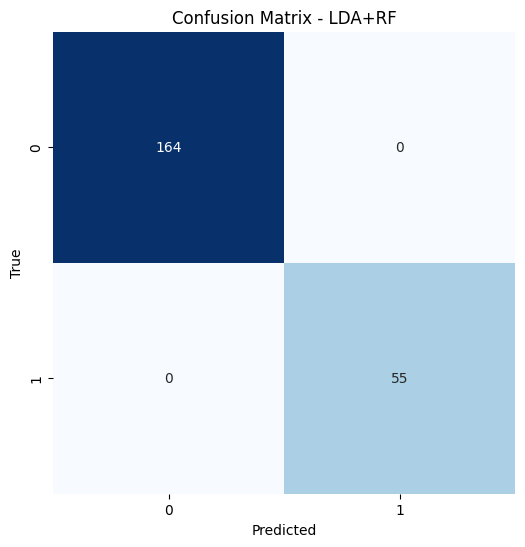

In [25]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred1)
fscore = f_score(y_test , y_pred1)
conf_m = confusion_matrix(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')
print(f'F-score: {fscore:.2f}') 

plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LDA+RF")
plt.show()

# LDA Model evaluation with Decision Tree

In [26]:
#LDA model evaluation with decision-tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

Accuracy: 1.00
F-score: 1.00


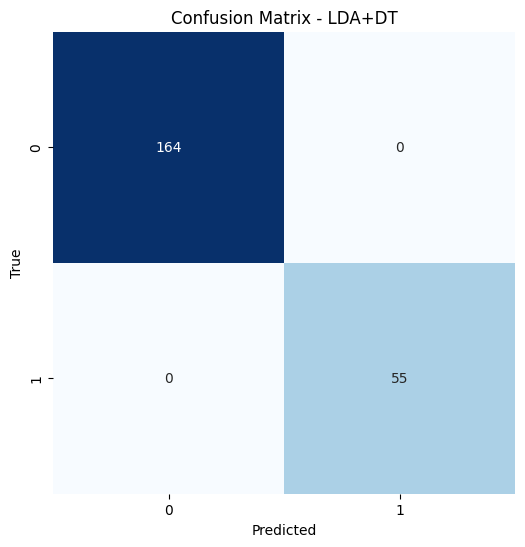

In [27]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred2)
fscore = f_score(y_test , y_pred2)
conf_m = confusion_matrix(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')
print(f'F-score: {fscore:.2f}') 

plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LDA+DT")
plt.show()

# LDA Model evaluation with Naive Bayes

In [28]:
#LDA model evaluation with Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred3 = nb.predict(X_test)

Accuracy: 1.00
F-score: 1.00


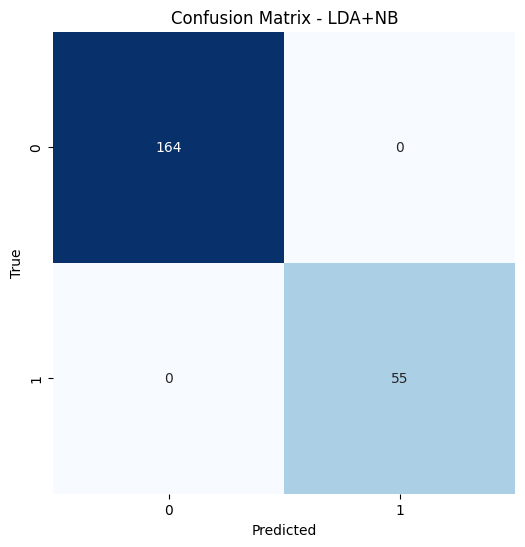

In [29]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred3)
fscore = f_score(y_test , y_pred3)
conf_m = confusion_matrix(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')
print(f'F-score: {fscore:.2f}') 

plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LDA+NB")
plt.show()

In [30]:
# LDA implementation (ref: https://sthalles.github.io/fisher-linear-discriminant/)

# Returns the parameters of the Gaussian distributions
# def gaussian(self, X):
#   means = {}
#   covariance = {}
#   priors = {}  # p(Ck)
#   for class_id, values in X.items():
#     proj = np.dot(values, self.W)
#     means[class_id] = np.mean(proj, axis=0)
#     covariance[class_id] = np.cov(proj, rowvar=False)
#     # estimate the priors using fractions of the training set data points in each of the classes.
#     priors[class_id] = values.shape[0] / self.N
#   return means, covariance, priors

# model a multi-variate Gaussian distribution for each class’ likelihood distribution P(x|Ck)
# def gaussian_distribution(self, x, u, cov):
#   scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
#   x_sub_u = np.subtract(x, u)
#   return scalar * np.exp(-np.dot(np.dot(x_sub_u, inv(cov)), x_sub_u.T) / 2.)

# def score(self,X,y):
#   proj = self.project(X)
#   gaussian_likelihoods = []
#   classes = sorted(list(self.g_means.keys()))
#   for x in proj:
#     row = []
#     for c in classes:  # number of classes
#       res = self.priors[c] * self.gaussian_distribution(x, self.g_means[c], self.g_covariance[c])  # Compute the posterios P(Ck|x) prob of a class k given a point x
#       row.append(res)

#     gaussian_likelihoods.append(row)

#   gaussian_likelihoods = np.asarray(gaussian_likelihoods)
#   assign x to the class with the largest posterior probability
#   predictions = np.argmax(gaussian_likelihoods, axis=1)
#   return np.sum(predictions == y) / len(y)